In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [27]:
df = pd.read_csv("C:/Users/harin/Downloads/bank-full.csv", sep=';')  
print(df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [28]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [29]:
X = df.drop('y', axis=1)
y = df['y']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

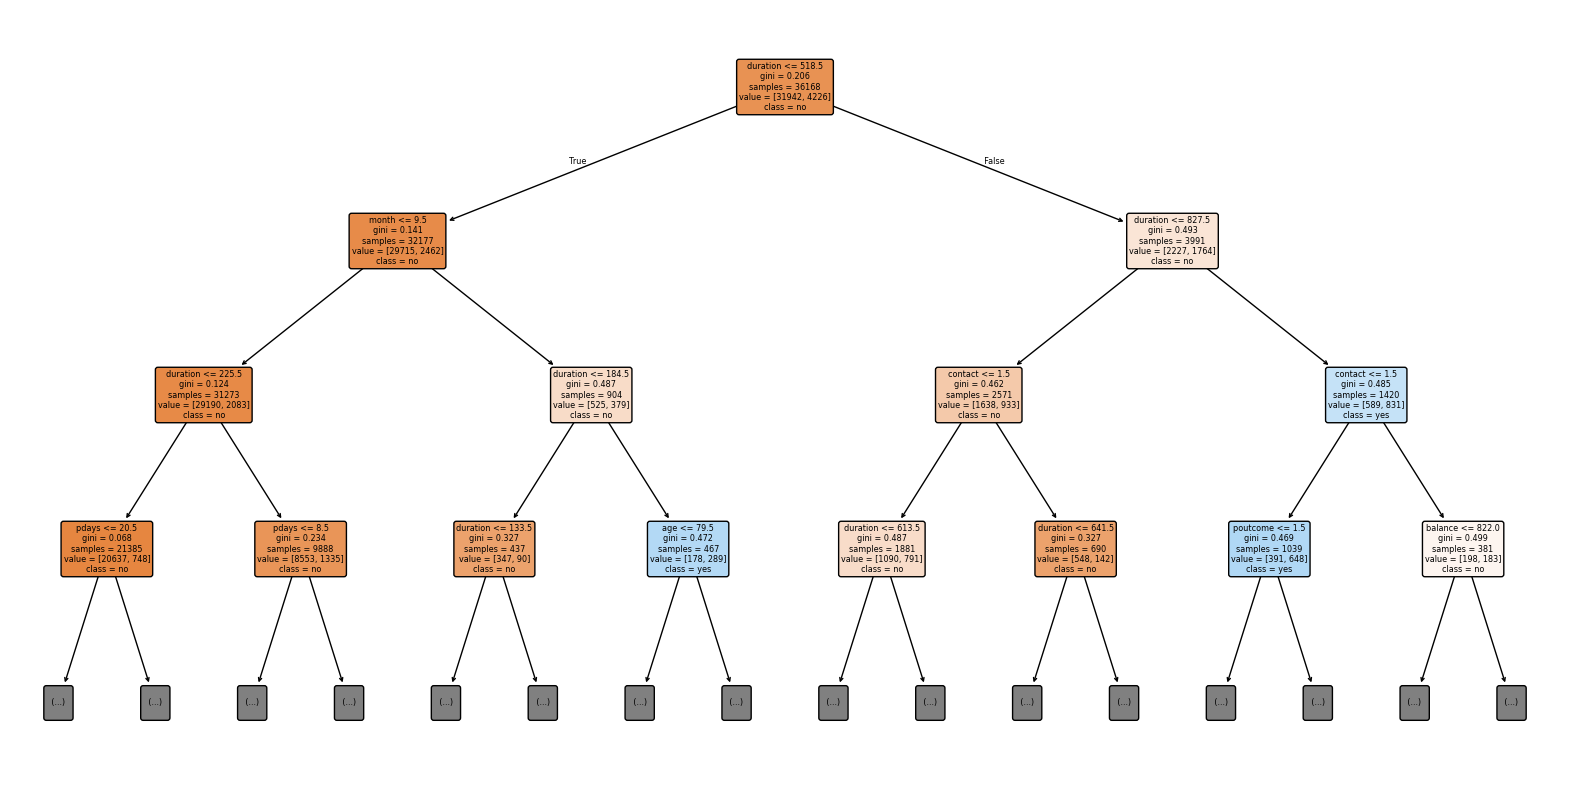

In [31]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)


plt.figure(figsize=(20, 10))
plot_tree(model,
          feature_names=X_train.columns,
          class_names=['no', 'yes'],
          filled=True,
          rounded=True,
          max_depth=3)
plt.show()


In [32]:
preds = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, preds))

Accuracy: 0.8667477606988832
